In [349]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.optimize import minimize

In [350]:
# Read the file
file_path = "f4.txt"
values = np.loadtxt(file_path)

In [351]:
# Define the function
def f(x):
    if 0.01 <= x <= len(values) * 0.01:
        return values[int(np.ceil(x / 0.01)) - 1]
    else:
        return np.nan

In [352]:
# Discrete Fourier Transform
def DiscreteFourierTransform(x):
    N = len(x)
    c = np.zeros(N, dtype=complex)
    for n in range(N):
        s = [x[m] * np.exp(-1j*2*np.pi*n*m/N) for m in range(N)]
        c[n] = sum(s) / N
    return np.abs(c)

In [353]:
# Extremum Finder
def ExtremumFinder(seq):
    extremums = []
    md = 2
    n = len(seq)
    for i in range(n):
        na = 0 if i-2<0 else seq[i-2]
        nb = 0 if i-1<0 else seq[i-1]
        nc = seq[i]
        nd = 0 if i+1>=n else seq[i+1]
        ne = 0 if i+2>=n else seq[i+2]

        if nc - na > md and nc - nb > md and nc - nd > md and nc - ne > md:
            extremums.append(i)
    return extremums

In [354]:
# Define x and y
x = np.arange(0.00, len(values)*0.01, 0.01)
y = np.array([f(xi) for xi in x])

# remove the first element
y = y[1:]

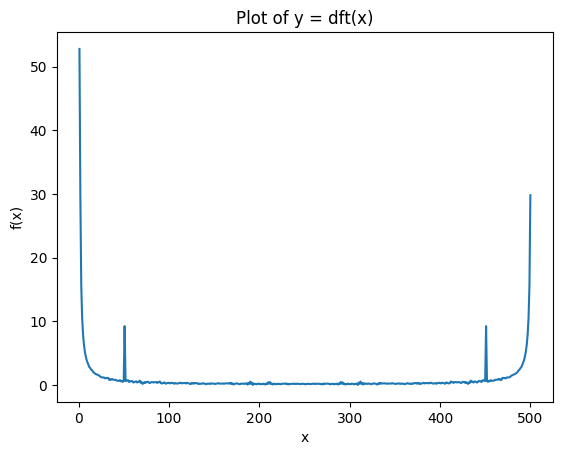

In [355]:
# Custom FFT
i_sequence = np.arange(1, 501)
dft = DiscreteFourierTransform(y)
plt.plot(i_sequence, dft)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of y = dft(x)')
plt.show()

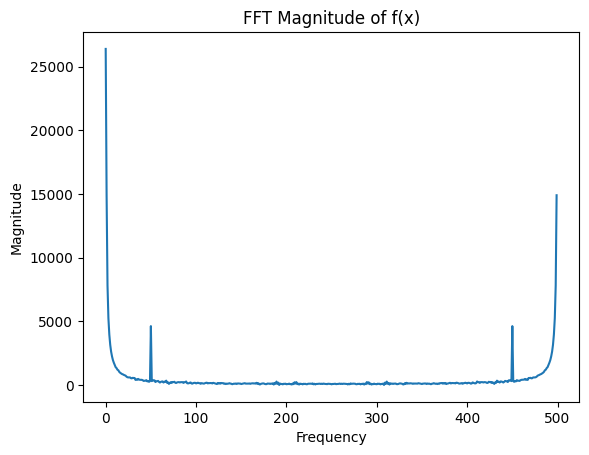

In [356]:
# FFT
fft_result = np.fft.fft(y)
fft_magnitude = np.abs(fft_result)

plt.plot(fft_magnitude)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('FFT Magnitude of f(x)')
plt.show()

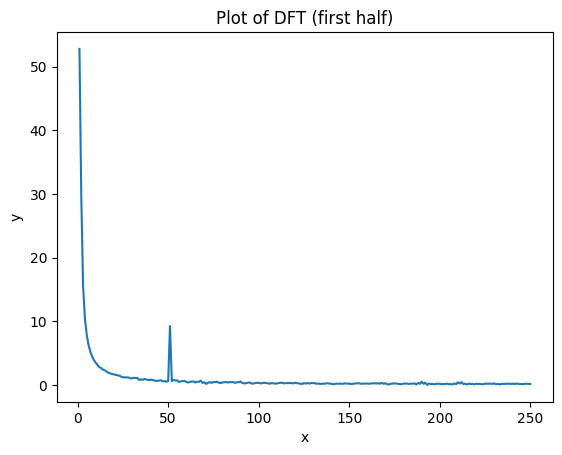

In [357]:
# Subvector
x_sub = x[:250]
d_sub = dft[:250]
i_sub = np.arange(1, 251)

plt.plot(i_sub, d_sub)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of DFT (first half)')
plt.show()

In [358]:
extremums = ExtremumFinder(d_sub)
print("Extremums: ", extremums)

Extremums:  [0, 50]


In [359]:
# x = x[:len(x)-1]
# append element to the end of the y array
y = np.append(y, [0])
# Derivative calculation
def objective(params):
    a1, a2, a3, a4, a5, a6 = params
    return sum((a1 * x**3 + a2 * x**2 + a3 * x + a4 * np.sin(np.pi*x*10) + a5*np.sin(np.pi*x*30) + a6 - y)**2) / 2

initial_guess = [0, 0, 0, 0, 0, 0]
result = minimize(objective, initial_guess)

print(result.x)

[ 1.44682747  0.60797224 -1.143108   -0.02109179 -0.04181315  5.1550535 ]


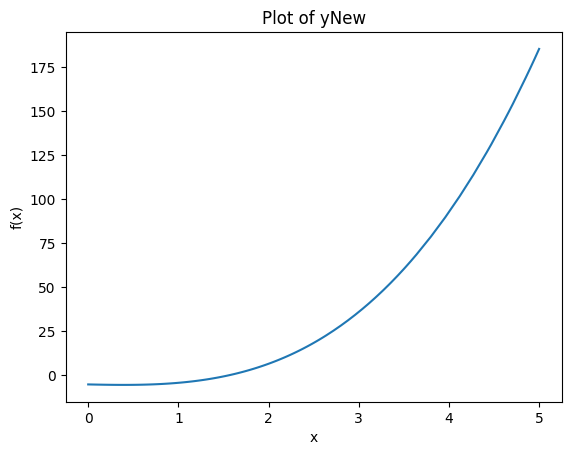

In [360]:
yNew = result.x[0] * x**3 + result.x[1] * x**2 + result.x[2] * x + result.x[3] * np.sin(np.pi*x*50) + result.x[4]*np.sin(np.pi*x*150) - result.x[5]

plt.plot(x, yNew)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of yNew')
plt.show()

In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [362]:
# Read the file
def read_numeric_vector_from_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    numeric_vector = [float(x) for x in lines[0].split()]
    return numeric_vector

In [363]:
file_path = "f4.txt"
values = read_numeric_vector_from_file(file_path)

y = values
x = np.arange(0.00, len(values)*0.01, 0.01)

# Create a DataFrame
data = pd.DataFrame({
    'x': x,
    'y': y,
})

In [364]:
# Fit the model
linear_model = ols('y ~ x + I(x**2) + I(x**3) + np.sin(10 * np.pi * x) + np.sin(30 * np.pi * x)', data).fit()

# Print the model summary
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1523.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          6.99e-298
Time:                        00:27:47   Log-Likelihood:                -2037.4
No. Observations:                 501   AIC:                             4087.
Df Residuals:                     495   BIC:                             4112.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

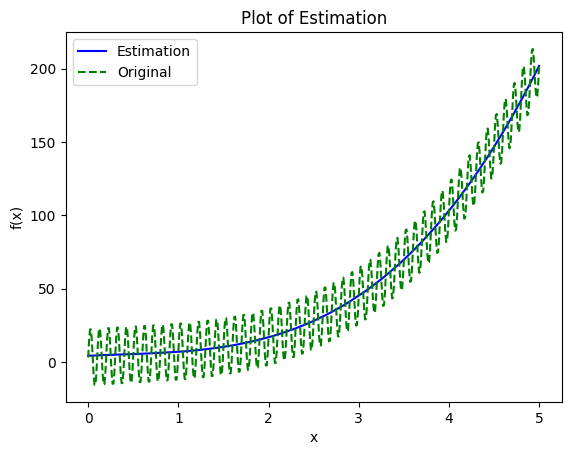

In [365]:
# Predict and plot
est = linear_model.predict(data)
plt.plot(x, est, label='Estimation', color='blue')
plt.plot(x, y, label='Original', color='green', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of Estimation')
plt.legend()
plt.show()

In [366]:
# Print the coefficients
coefficients = linear_model.params
print(coefficients)

Intercept                 4.210401
x                         2.821639
I(x ** 2)                -1.983479
I(x ** 3)                 1.864464
np.sin(10 * np.pi * x)   -0.030515
np.sin(30 * np.pi * x)   -0.009501
dtype: float64


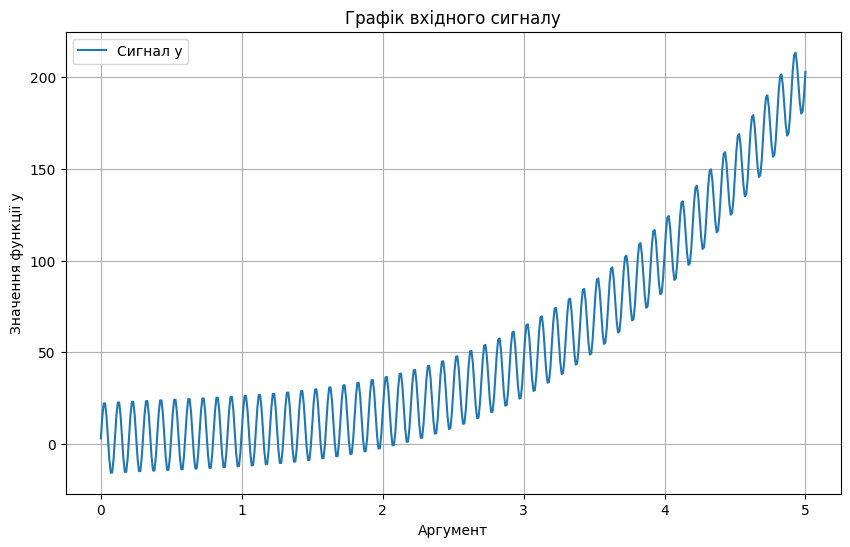

In [367]:
import matplotlib.pyplot as plt

# Генеруємо послідовність аргументів з кроком 0.01
x = [i * 0.01 for i in range(len(values))]

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.plot(x, values, label='Сигнал y')
plt.title('Графік вхідного сигналу')
plt.xlabel('Аргумент')
plt.ylabel('Значення функції y')
plt.grid(True)
plt.legend()
plt.show()